In [93]:
# Bee Demo

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns

import scipy.stats as stats
from scipy.stats import linregress
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#wurzburg
# File to Load (Remember to change these)
wurz_flow_csv = "data/flow_wurzburg.csv"
wurz_weight_csv = "data/weight_wurzburg.csv"
wurz_temp_csv = "data/temperature_wurzburg.csv"
wurz_humid_csv = "data/humidity_wurzburg.csv"


# Read the hive Data
wurz_flow = pd.read_csv(wurz_flow_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
wurz_weight_old = pd.read_csv(wurz_weight_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
wurz_temp = pd.read_csv(wurz_temp_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
wurz_humid_old = pd.read_csv(wurz_humid_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)




In [2]:
#Schwartau
# File to Load (Remember to change these)

schwa_flow_csv = "data/flow_schwartau.csv"
schwa_weight_csv = "data/weight_schwartau.csv"
schwa_temp_csv = "data/temperature_schwartau.csv"
schwa_humid_csv = "data/humidity_schwartau.csv"

# Read the hive Data

schwa_flow = pd.read_csv(schwa_flow_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
schwa_weight_old = pd.read_csv(schwa_weight_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
schwa_temp = pd.read_csv(schwa_temp_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
schwa_humid_old = pd.read_csv(schwa_humid_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)




In [3]:
# fix the negative values showing up the weight and humid files. make new DF by removing any values less than zero


wurz_weight = wurz_weight_old[wurz_weight_old['weight'] > 0]
wurz_humid = wurz_humid_old[wurz_humid_old['humidity'] > 0]
schwa_weight = schwa_weight_old[schwa_weight_old['weight'] > 0]
schwa_humid = schwa_humid_old[schwa_humid_old['humidity'] > 0]


In [4]:
# Wurz
# add a column for day, pull the date from timestamp colummn and populate in day column in each data source used.
# also calculate the following:
# flow sum
# weight mean
# temp mean
# humid mean

pd.DatetimeIndex(wurz_flow.timestamp).normalize()
wurz_flow['day'] = pd.DatetimeIndex(wurz_flow.timestamp).normalize()
wgroup_flow = wurz_flow.groupby("day").sum()

wurz_weight['day'] = pd.DatetimeIndex(wurz_weight.timestamp).normalize()
wgroup_weight = wurz_weight.groupby("day").mean()

wurz_temp['day'] = pd.DatetimeIndex(wurz_temp.timestamp).normalize()
wgroup_temp = wurz_temp.groupby("day").mean()

wurz_humid['day'] = pd.DatetimeIndex(wurz_humid.timestamp).normalize()
wgroup_humid = wurz_humid.groupby("day").mean()

In [5]:
# Schwartau
# add a column for day, pull the date from timestamp colummn and populate in day column in each data source used.
# also calculate the following:
# flow sum
# weight mean
# temp mean
# humid mean

pd.DatetimeIndex(schwa_flow.timestamp).normalize()
schwa_flow['day'] = pd.DatetimeIndex(schwa_flow.timestamp).normalize()
sgroup_flow = schwa_flow.groupby("day").sum()

schwa_weight['day'] = pd.DatetimeIndex(schwa_weight.timestamp).normalize()
sgroup_weight = schwa_weight.groupby("day").mean()

schwa_temp['day'] = pd.DatetimeIndex(schwa_temp.timestamp).normalize()
sgroup_temp = schwa_temp.groupby("day").mean()

schwa_humid['day'] = pd.DatetimeIndex(schwa_humid.timestamp).normalize()
sgroup_humid = schwa_humid.groupby("day").mean()

In [6]:
# Wurz
# Combine the data into a single dataset

wurz_3_df = pd.merge(wgroup_humid, wgroup_temp, on="day", how="inner")
wurz_2_df = pd.merge(wurz_3_df, wgroup_weight, on="day", how="inner")
wurz_hive_df = pd.merge(wurz_2_df, wgroup_flow, on="day", how="inner")

wurz_df = wurz_hive_df.rename(columns={"humidity":"w_humidity",
                                       "temperature":"w_temperature",
                                       "weight":"w_weight",
                                       "flow":"w_flow"})


wurz_df.head()

,w_humidity,w_temperature,w_weight,w_flow
day,,,,
2017-01-01,92.058947,-0.082160,52.661690,-6
2017-01-02,92.794722,1.825578,52.671111,-9
2017-01-03,91.173472,3.082557,52.653767,-7
2017-01-04,91.077917,3.750071,52.610835,-21
2017-01-05,82.656076,2.259225,52.623591,-12


In [7]:
# Schwartau
# Combine the data into a single dataset

schwa_3_df = pd.merge(sgroup_humid, sgroup_temp, on="day", how="inner")
schwa_2_df = pd.merge(schwa_3_df, sgroup_weight, on="day", how="inner")
schwa_hive_df = pd.merge(schwa_2_df, sgroup_flow, on="day", how="inner")

schwa_df = schwa_hive_df.rename(columns={"humidity":"s_humidity",
                                       "temperature":"s_temperature",
                                       "weight":"s_weight",
                                       "flow":"s_flow"})


schwa_df.head()

,s_humidity,s_temperature,s_weight,s_flow
day,,,,
2017-01-01,98.040310,15.477829,50736.790078,-5
2017-01-02,98.806319,13.376389,50657.796250,-22
2017-01-03,98.403472,16.181965,50769.785556,-30
2017-01-04,97.292292,14.724111,50532.602778,-28
2017-01-05,96.583889,9.058442,50109.808194,-11


In [8]:
# merge the hive data for werzberg and shcwartau

ws_df = pd.merge(wurz_df, schwa_df, on="day", how="inner")
ws_df.head()

,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow
day,,,,,,,,
2017-01-01,92.058947,-0.082160,52.661690,-6,98.040310,15.477829,50736.790078,-5
2017-01-02,92.794722,1.825578,52.671111,-9,98.806319,13.376389,50657.796250,-22
2017-01-03,91.173472,3.082557,52.653767,-7,98.403472,16.181965,50769.785556,-30
2017-01-04,91.077917,3.750071,52.610835,-21,97.292292,14.724111,50532.602778,-28
2017-01-05,82.656076,2.259225,52.623591,-12,96.583889,9.058442,50109.808194,-11


In [9]:
# Export the combined hive data as a CSV, with the Pandas index and with the header
ws_df.to_csv("ws.csv", index=True, header=True)
ws_df.to_csv("data/ws.csv", index=True, header=True)

In [10]:
#load the hive data and the weather data 

#wurzburg
# File to Load (Remember to change these)
ws_csv = "data/ws.csv"
ww_csv = "data/Wurzburg_Weather_Cleaned.csv"
sc_csv = "data/schwartau_Weather_Cleaned.csv"

# Read the hive Data
ws_df = pd.read_csv(ws_csv)
ww_df = pd.read_csv(ww_csv)
sc_df = pd.read_csv(sc_csv)

ws_df = ws_df.rename(columns={"day":"date"})
ww_df = ww_df.rename(columns={"T":"w_city_temp",
                             "U":"w_city_humid",
                             "Date":"date"})

sc_df = sc_df.rename(columns={"T":"s_city_temp",
                             "U":"s_city_humid",
                             "Date":"date"})

sc_df.head()

,date,s_city_temp,s_city_humid
0,2017-01-01,5.000000,91.000000
1,2017-01-02,0.708333,95.416667
2,2017-01-03,4.714286,80.750000
3,2017-01-04,15.178571,71.678571
4,2017-01-05,12.206897,57.172414


In [11]:
# merge the hive file with the weather files

weather_hive_2_df = pd.merge(ws_df, ww_df, on="date", how="inner")
weather_hive_ws_df = pd.merge(weather_hive_2_df, sc_df, on="date", how="inner")
weather_hive_ws_df.head()

,date,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
0,2017-01-01,92.058947,-0.082160,52.661690,-6,98.040310,15.477829,50736.790078,-5,-5.145833,95.250000,5.000000,91.000000
1,2017-01-02,92.794722,1.825578,52.671111,-9,98.806319,13.376389,50657.796250,-22,1.583333,86.208333,0.708333,95.416667
2,2017-01-03,91.173472,3.082557,52.653767,-7,98.403472,16.181965,50769.785556,-30,5.220833,80.083333,4.714286,80.750000
3,2017-01-04,91.077917,3.750071,52.610835,-21,97.292292,14.724111,50532.602778,-28,14.466667,59.083333,15.178571,71.678571
4,2017-01-05,82.656076,2.259225,52.623591,-12,96.583889,9.058442,50109.808194,-11,8.235000,74.350000,12.206897,57.172414


In [12]:
# Export the merged weather and hive data as a CSV, with the Pandas index and with the header
weather_hive_ws_df.to_csv("weather_hive_ws.csv", index=True, header=True)
weather_hive_ws_df.to_csv("data/weather_hive_ws.csv", index=True, header=True)

In [13]:
# load the combined weather had hive file and begin condensing to a monthly average

#wurzburg
# File to Load (Remember to change these)
weather_hive_ws_csv = "data/weather_hive_ws.csv"


# Read the hive Data
weather_hive_ws = pd.read_csv(weather_hive_ws_csv, parse_dates=['date'], date_parser=pd.to_datetime, index_col=0)

weather_hive_ws.dtypes

date             datetime64[ns]
w_humidity              float64
w_temperature           float64
w_weight                float64
w_flow                    int64
s_humidity              float64
s_temperature           float64
s_weight                float64
s_flow                    int64
w_city_temp             float64
w_city_humid            float64
s_city_temp             float64
s_city_humid            float64
dtype: object

In [14]:
weather_hive_ws.head()

,date,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
0,2017-01-01,92.058947,-0.082160,52.661690,-6,98.040310,15.477829,50736.790078,-5,-5.145833,95.250000,5.000000,91.000000
1,2017-01-02,92.794722,1.825578,52.671111,-9,98.806319,13.376389,50657.796250,-22,1.583333,86.208333,0.708333,95.416667
2,2017-01-03,91.173472,3.082557,52.653767,-7,98.403472,16.181965,50769.785556,-30,5.220833,80.083333,4.714286,80.750000
3,2017-01-04,91.077917,3.750071,52.610835,-21,97.292292,14.724111,50532.602778,-28,14.466667,59.083333,15.178571,71.678571
4,2017-01-05,82.656076,2.259225,52.623591,-12,96.583889,9.058442,50109.808194,-11,8.235000,74.350000,12.206897,57.172414


In [15]:
#set the index back to the date column

weather_hive_ws = weather_hive_ws.set_index("date")
weather_hive_ws.head()

,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
date,,,,,,,,,,,,
2017-01-01,92.058947,-0.082160,52.661690,-6,98.040310,15.477829,50736.790078,-5,-5.145833,95.250000,5.000000,91.000000
2017-01-02,92.794722,1.825578,52.671111,-9,98.806319,13.376389,50657.796250,-22,1.583333,86.208333,0.708333,95.416667
2017-01-03,91.173472,3.082557,52.653767,-7,98.403472,16.181965,50769.785556,-30,5.220833,80.083333,4.714286,80.750000
2017-01-04,91.077917,3.750071,52.610835,-21,97.292292,14.724111,50532.602778,-28,14.466667,59.083333,15.178571,71.678571
2017-01-05,82.656076,2.259225,52.623591,-12,96.583889,9.058442,50109.808194,-11,8.235000,74.350000,12.206897,57.172414


In [16]:
#trying to groupby month in the date column. used grouper

month_avg_weather_hive_ws = weather_hive_ws.groupby(pd.Grouper(freq='M')).mean()
month_avg_weather_hive_ws.head()

,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
date,,,,,,,,,,,,
2017-01-31,88.924949,4.132509,52.123729,-29.166667,97.477295,10.197422,50215.159135,-19.600000,2.214264,78.650133,5.018011,85.150617
2017-02-28,86.739573,11.556415,49.996432,-169.300000,90.810861,13.598453,49183.048264,-36.300000,4.788542,79.706250,4.777360,83.709077
2017-03-31,80.167109,16.008629,48.708102,-1272.612903,94.620217,21.401484,47667.159922,276.580645,9.816964,73.816195,10.195906,73.615292
2017-04-30,86.295250,22.659330,49.585359,-1681.166667,92.788956,33.640373,50097.460384,-431.900000,8.589727,71.858361,8.791624,73.626336
2017-05-31,65.102136,27.104621,56.683475,-4814.903226,76.889198,34.737434,63299.941965,2064.516129,14.959140,72.080645,15.309315,72.582105


In [17]:
# Extracting just Month and Year from Pandas Datetime column


month_avg_weather_hive_ws['month_year'] = pd.to_datetime(month_avg_weather_hive_ws.index).to_period('M')
month_avg_weather_hive_ws.head()

,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid,month_year
date,,,,,,,,,,,,,
2017-01-31,88.924949,4.132509,52.123729,-29.166667,97.477295,10.197422,50215.159135,-19.600000,2.214264,78.650133,5.018011,85.150617,2017-01
2017-02-28,86.739573,11.556415,49.996432,-169.300000,90.810861,13.598453,49183.048264,-36.300000,4.788542,79.706250,4.777360,83.709077,2017-02
2017-03-31,80.167109,16.008629,48.708102,-1272.612903,94.620217,21.401484,47667.159922,276.580645,9.816964,73.816195,10.195906,73.615292,2017-03
2017-04-30,86.295250,22.659330,49.585359,-1681.166667,92.788956,33.640373,50097.460384,-431.900000,8.589727,71.858361,8.791624,73.626336,2017-04
2017-05-31,65.102136,27.104621,56.683475,-4814.903226,76.889198,34.737434,63299.941965,2064.516129,14.959140,72.080645,15.309315,72.582105,2017-05


In [18]:
# set the index to the month_year column

month_summary = month_avg_weather_hive_ws.set_index("month_year")
month_summary.head()

,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
month_year,,,,,,,,,,,,
2017-01,88.924949,4.132509,52.123729,-29.166667,97.477295,10.197422,50215.159135,-19.600000,2.214264,78.650133,5.018011,85.150617
2017-02,86.739573,11.556415,49.996432,-169.300000,90.810861,13.598453,49183.048264,-36.300000,4.788542,79.706250,4.777360,83.709077
2017-03,80.167109,16.008629,48.708102,-1272.612903,94.620217,21.401484,47667.159922,276.580645,9.816964,73.816195,10.195906,73.615292
2017-04,86.295250,22.659330,49.585359,-1681.166667,92.788956,33.640373,50097.460384,-431.900000,8.589727,71.858361,8.791624,73.626336
2017-05,65.102136,27.104621,56.683475,-4814.903226,76.889198,34.737434,63299.941965,2064.516129,14.959140,72.080645,15.309315,72.582105


In [19]:
# Export file as a CSV, with the Pandas index and with the header....
#month_summary.to_csv("month_summary.csv", index=True, header=True)
#month_summary.to_csv("data/month_summary.csv", index=True, header=True)

In [20]:
###### Wurzburg City Monthly Temperature Analysis ########

In [21]:
monthly = "month_summary.csv"

monthly_df = pd.read_csv(monthly, encoding="ISO-8859-1")
monthly_df = monthly_df.round(2)
monthly_df.head()

,month_year,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
0,2017-01,88.92,4.13,52.12,-29.17,97.48,10.20,50215.16,-19.60,2.21,78.65,5.02,85.15
1,2017-02,86.74,11.56,50.00,-169.30,90.81,13.60,49183.05,-36.30,4.79,79.71,4.78,83.71
2,2017-03,80.17,16.01,48.71,-1272.61,94.62,21.40,47667.16,276.58,9.82,73.82,10.20,73.62
3,2017-04,86.30,22.66,49.59,-1681.17,92.79,33.64,50097.46,-431.90,8.59,71.86,8.79,73.63
4,2017-05,65.10,27.10,56.68,-4814.90,76.89,34.74,63299.94,2064.52,14.96,72.08,15.31,72.58


In [22]:
monthly_df_clean = monthly_df.dropna()
#monthly_df_clean

In [23]:
#create new Wurzburg temperature dataframe 
w_temp_month_df = monthly_df_clean[['month_year', 'w_city_temp', 'w_flow', 'w_weight']]
#w_temp_df

In [24]:
#create x and y variables for lin. regress. analysis monthly temp vs weight
mon_x_axis_w_temp = w_temp_month_df['w_city_temp']
mon_y_axis_w_weight = w_temp_month_df['w_weight']
#x_axis_w_temp
#y_axis_w_weight

In [25]:
# Find min/max for temp to set limits
temp_min = w_temp_month_df['w_city_temp'].min()
temp_max = w_temp_month_df['w_city_temp'].max()
print(temp_min)
print(temp_max)

0.22
16.15


In [26]:
# Find min/max for weight to set limits
weight_min = w_temp_month_df['w_weight'].min()
weight_max = w_temp_month_df['w_weight'].max()
print(weight_min)
print(weight_max)

48.71
67.2


In [29]:
#set line for lin. regress. analysis daily temp vs weight
(slope, intercept, _, _, _) = linregress(mon_x_axis_w_temp, mon_y_axis_w_weight)
fit = slope * mon_x_axis_w_temp + intercept

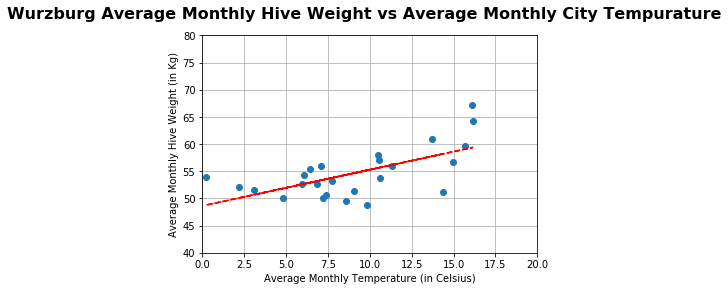

In [31]:
#Plot monthly temp vs weight
fig, ax = plt.subplots()

fig.suptitle("Wurzburg Average Monthly Hive Weight vs Average Monthly City Tempurature", fontsize=16, fontweight="bold")

ax.set_xlim(0, 20)
ax.set_ylim(40, 80)


ax.set_xlabel("Average Monthly Temperature (in Celsius)")
ax.set_ylabel("Average Monthly Hive Weight (in Kg)")

ax.plot(mon_x_axis_w_temp, mon_y_axis_w_weight, linewidth=0, marker='o')
ax.plot(mon_x_axis_w_temp, fit, 'r--')
plt.grid()

plt.show()

In [33]:
# Find the correlation coefficient and p-value monthly temp vs weight
stats.pearsonr(mon_x_axis_w_temp, mon_y_axis_w_weight)
# 95% chance that temp and weight are poorly correlated in Wurzburg colony.

(0.6333592951018491, 0.0006773945024694385)

In [ ]:
###### Wurzburg Daily Temperature-Weight Analysis ########

In [34]:
daily = "weather_hive_ws.csv"

daily_df = pd.read_csv(daily, encoding="ISO-8859-1")
daily_df = daily_df.round(2)
#daily_df.head()

In [81]:
#create new Wurzburg temperature dataframe 
w_temp_df = daily_df[['date', 'w_city_temp', 'w_flow', 'w_weight']]
w_temp_df['w_flow'] = w_temp_df['w_flow'].astype(float)
#w_temp_df.head()


In [82]:
w_temp_df.dtypes

date            object
w_city_temp    float64
w_flow         float64
w_weight       float64
dtype: object

In [83]:
#create x and y variables for lin. regress. analysis daily temp vs weight
x_axis_w_temp = w_temp_df['w_city_temp']
y_axis_w_weight = w_temp_df['w_weight']
#x_axis_w_temp
#y_axis_w_weight

In [84]:
# Find min/max for weight to set limits
weight_min = w_temp_df['w_weight'].min()
weight_max = w_temp_df['w_weight'].max()
print(weight_min)
print(weight_max)

0.08
68.51


In [38]:
# Find min/max for tempurature to set limits
temp_min = w_temp_df['w_city_temp'].min()
temp_max = w_temp_df['w_city_temp'].max()
print(temp_min)
print(temp_max)

-9.2
28.08


In [39]:
#set line for lin. regress. analysis daily temp vs weight
(slope, intercept, _, _, _) = linregress(x_axis_w_temp, y_axis_w_weight)
fit = slope * x_axis_w_temp + intercept

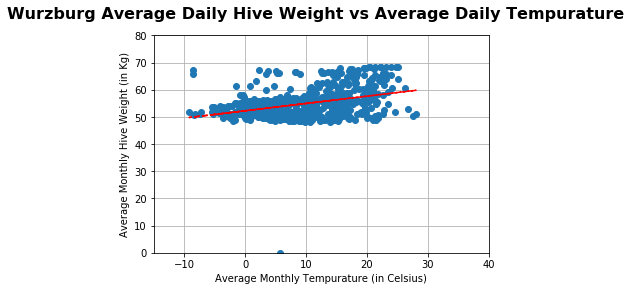

In [40]:
#Plot monthly temp vs weight
fig, ax = plt.subplots()

fig.suptitle("Wurzburg Average Daily Hive Weight vs Average Daily Tempurature", fontsize=16, fontweight="bold")

ax.set_xlim(-15, 40)
ax.set_ylim(0, 80)


ax.set_xlabel("Average Monthly Tempurature (in Celsius)")
ax.set_ylabel("Average Monthly Hive Weight (in Kg)")

ax.plot(x_axis_w_temp, y_axis_w_weight, linewidth=0, marker='o')
ax.plot(x_axis_w_temp, fit, 'r--')
plt.grid()

plt.show()

In [41]:
# Find the correlation coefficient and p-value monthly temp vs weight
stats.pearsonr(x_axis_w_temp, y_axis_w_weight)
# 95% chance that temp and weight are poorly correlated in Wurzburg colony.
# Outside temperature has little to no effect on the Wurzburg Bee Colony.

(0.3687635704465886, 2.116713337047591e-22)

In [ ]:
###### Wurzburg Daily Temperature-Flow Analysis ########

In [89]:
#create x and y variables for lin. regress. analysis daily temp vs weight
#x_axis_w_temp = w_temp_df['w_city_temp']
y_axis_w_flow = w_temp_df['w_flow']
#x_axis_w_temp
#y_axis_w_flow

In [90]:
# Find min/max for weight to set limits
flow_min = w_temp_df['w_flow'].min()
flow_max = w_temp_df['w_flow'].max()
print(weight_min)
print(weight_max)

-17273.0
3456.0


In [91]:
#set line for lin. regress. analysis daily temp vs weight
(slope, intercept, _, _, _) = linregress(x_axis_w_temp, y_axis_w_flow)
fit = slope * x_axis_w_temp + intercept

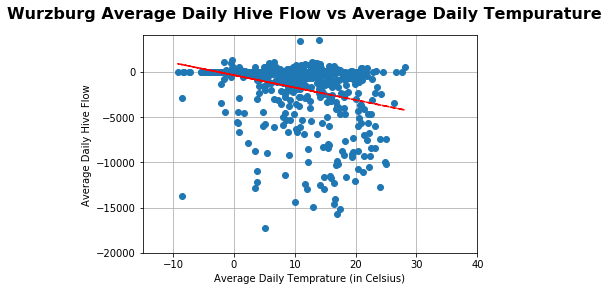

In [92]:
#Plot monthly temp vs weight
fig, ax = plt.subplots()

fig.suptitle("Wurzburg Average Daily Hive Flow vs Average Daily Tempurature", fontsize=16, fontweight="bold")

ax.set_xlim(-15, 40)
ax.set_ylim(-20000, 4000)


ax.set_xlabel("Average Daily Temprature (in Celsius)")
ax.set_ylabel("Average Daily Hive Flow")

ax.plot(x_axis_w_temp, y_axis_w_flow, linewidth=0, marker='o')
ax.plot(x_axis_w_temp, fit, 'r--')
plt.grid()

plt.show()

In [47]:
# Find the correlation coefficient and p-value monthly temp vs flow
stats.pearsonr(x_axis_w_temp, y_axis_w_flow)
# 95% chance that city temp and flow have a poor negative correlation in Wurzburg colony.
# Outside temperature has little to no effect on the Wurzburg Bee Colony's flow.

(-0.31491428777883285, 1.8751662034702389e-16)

In [95]:
wurz_df = daily_df[['w_humidity', 'w_temperature', 'w_weight', 'w_flow', 'w_city_temp', 'w_city_humid']]
wurz_df.head()

,w_humidity,w_temperature,w_weight,w_flow,w_city_temp,w_city_humid
0,92.06,-0.08,52.66,-6,-5.15,95.25
1,92.79,1.83,52.67,-9,1.58,86.21
2,91.17,3.08,52.65,-7,5.22,80.08
3,91.08,3.75,52.61,-21,14.47,59.08
4,82.66,2.26,52.62,-12,8.24,74.35


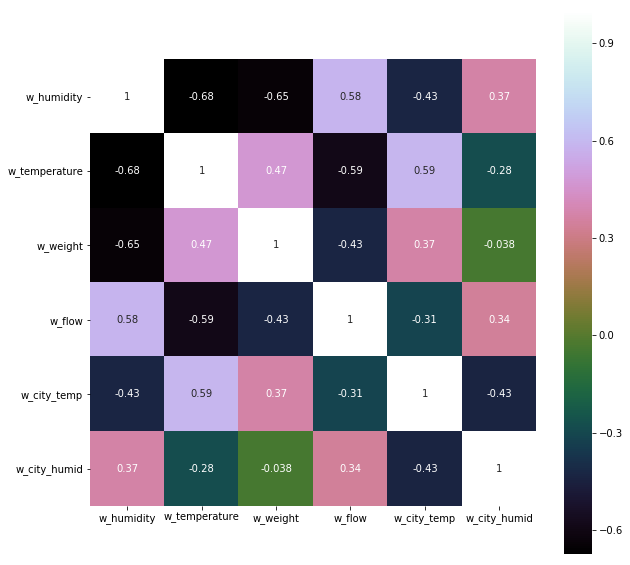

In [98]:
Wurz_corr_mat = wurz_df.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')